<a href="https://colab.research.google.com/github/Siddhi-Sovle/Data-Science/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/crime_data.csv")

In [ ]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [ ]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


#UNIVARIATE ANALYSIS

For: Murder


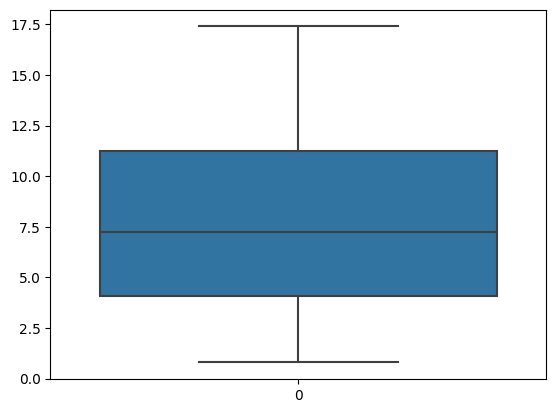

For: Assault


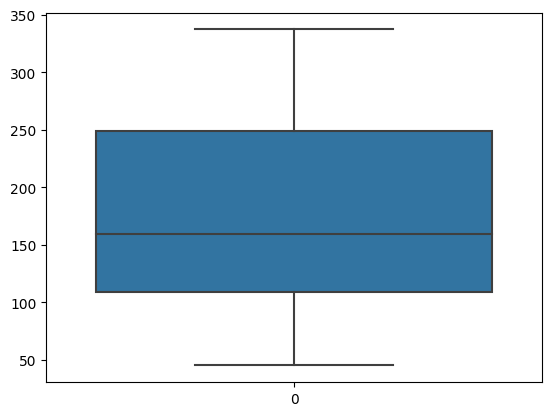

For: UrbanPop


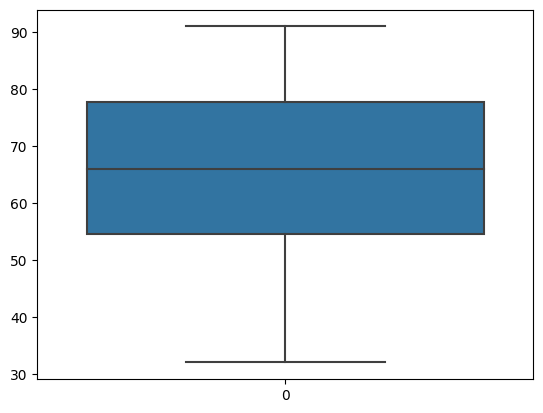

For: Rape


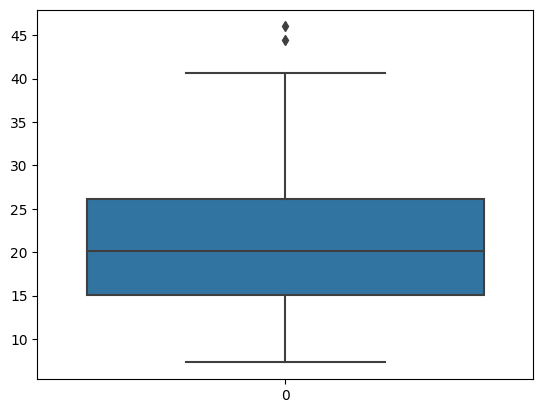

In [ ]:
for i in df.columns:
  print("For:", i)
  sns.boxplot(df[i])
  plt.show()

In [ ]:
Q3 = df['Rape'].quantile(q=0.75)
Q1 = df['Rape'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
up = Q3 + 1.5 * IQR
down = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

a = cap_extreme_values(df['Rape'], down, up)
print(a)

11.100000000000001
0     21.200
1     42.825
2     31.000
3     19.500
4     40.600
5     38.700
6     11.100
7     15.800
8     31.900
9     25.800
10    20.200
11    14.200
12    24.000
13    21.000
14    11.300
15    18.000
16    16.300
17    22.200
18     7.800
19    27.800
20    16.300
21    35.100
22    14.900
23    17.100
24    28.200
25    16.400
26    16.500
27    42.825
28     9.500
29    18.800
30    32.100
31    26.100
32    16.100
33     7.300
34    21.400
35    20.000
36    29.300
37    14.900
38     8.300
39    22.500
40    12.800
41    26.900
42    25.500
43    22.900
44    11.200
45    20.700
46    26.200
47     9.300
48    10.800
49    15.600
Name: Rape, dtype: float64


In [ ]:
df['Rape'] = a

<Axes: >

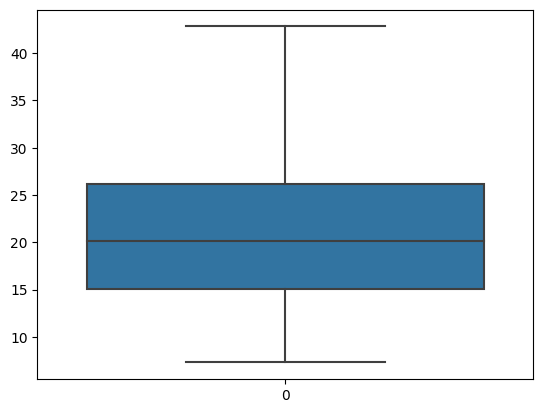

In [ ]:
sns.boxplot(df['Rape'])

#BIVARIATE ANALYSIS

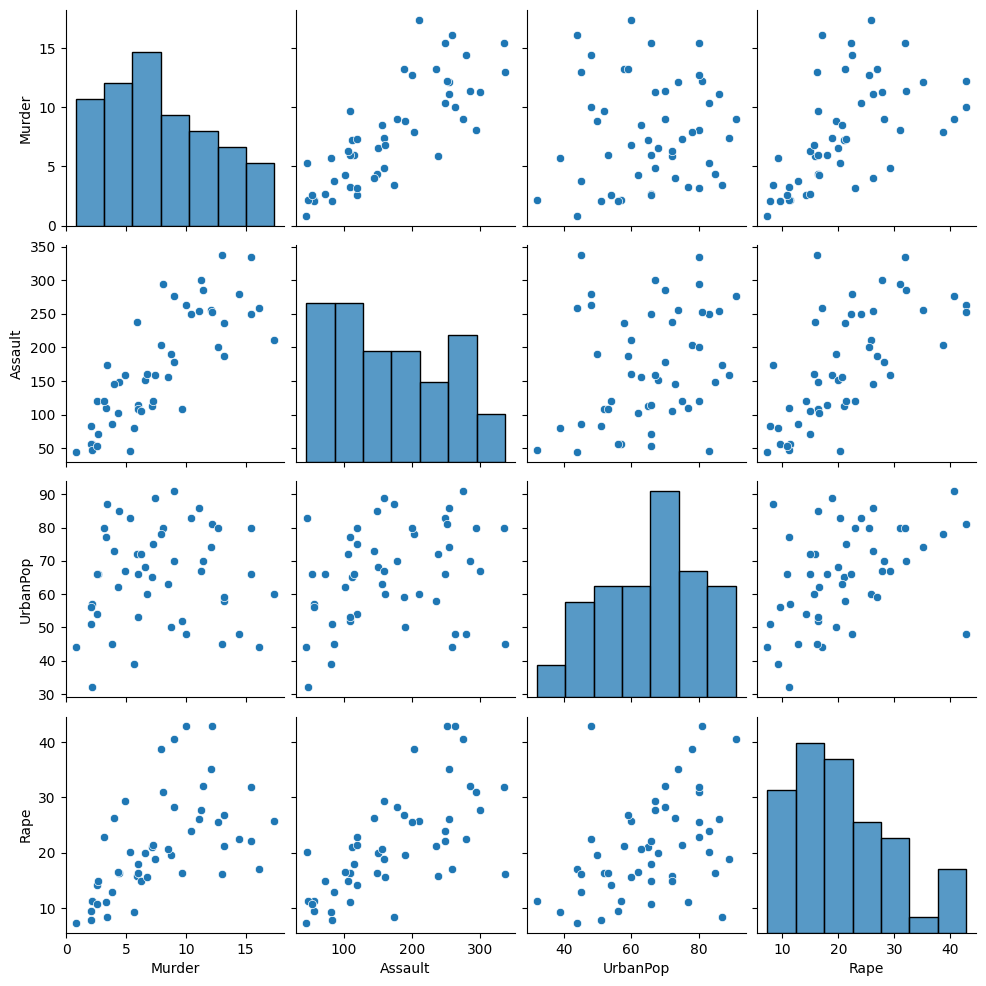

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.569678
Assault,0.801873,1.000000,0.258872,0.672108
UrbanPop,0.069573,0.258872,1.000000,0.419388
Rape,0.569678,0.672108,0.419388,1.000000


#MODEL BUILDING

In [ ]:
pip install scikit-learn


In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

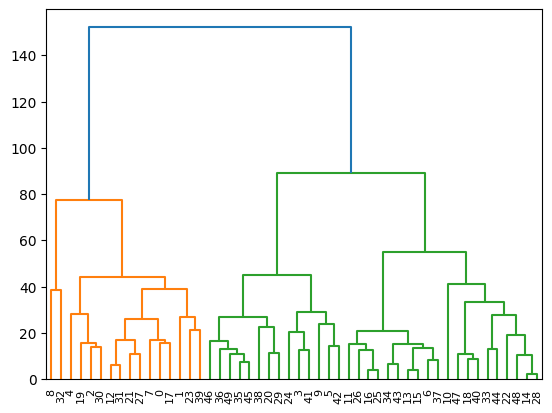

In [ ]:
dend = sch.dendrogram(sch.linkage(df, method='average'))

In [ ]:
sch.linkage(df, method='average')

array([[ 14.        ,  28.        ,   2.29128785,   2.        ],
       [ 16.        ,  25.        ,   3.8340579 ,   2.        ],
       [ 13.        ,  15.        ,   3.92937654,   2.        ],
       [ 12.        ,  31.        ,   6.23698645,   2.        ],
       [ 34.        ,  43.        ,   6.63777071,   2.        ],
       [ 35.        ,  45.        ,   7.35527022,   2.        ],
       [  6.        ,  37.        ,   8.0274529 ,   2.        ],
       [ 18.        ,  40.        ,   8.53756406,   2.        ],
       [ 48.        ,  50.        ,  10.18421787,   3.        ],
       [ 49.        ,  55.        ,  10.73673882,   3.        ],
       [ 47.        ,  57.        ,  10.77117522,   3.        ],
       [ 21.        ,  27.        ,  10.84830056,   2.        ],
       [ 20.        ,  29.        ,  11.45643924,   2.        ],
       [ 26.        ,  51.        ,  12.43869175,   3.        ],
       [  3.        ,  41.        ,  12.61427762,   2.        ],
       [ 36.        ,  59

In [ ]:
a = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

In [ ]:
y = a.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [ ]:
df['Clusters'] = y

In [ ]:
df

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.200,0
1,10.0,263,48,42.825,0
2,8.1,294,80,31.000,0
3,8.8,190,50,19.500,2
4,9.0,276,91,40.600,0
5,7.9,204,78,38.700,2
6,3.3,110,77,11.100,3
7,5.9,238,72,15.800,0
8,15.4,335,80,31.900,0
9,17.4,211,60,25.800,2


In [ ]:
df.groupby('Clusters').mean()

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,11.812500,272.562500,68.312500,28.071875
1,2.950000,62.700000,53.900000,11.510000
2,8.214286,173.285714,70.642857,22.842857
3,5.590000,112.400000,65.600000,17.270000


In [ ]:
#Profilling
#People not belonging to urbanpop --> least likely to get assaulted --> least likely to get murdered
#People not exactly belonging to the urban pop(might be people coming from rural to urban) --> most likely to get assaulted --> most likely to get raped --> most likely to get murdered
#People belonging to urbanpop --> Less likely to get assaulted --> Less likely to get assaulted --> less likely to get raped --> less likely to get murdered

In [ ]:
df['Clusters'].unique()

array([0, 2, 3, 1])

<Axes: >

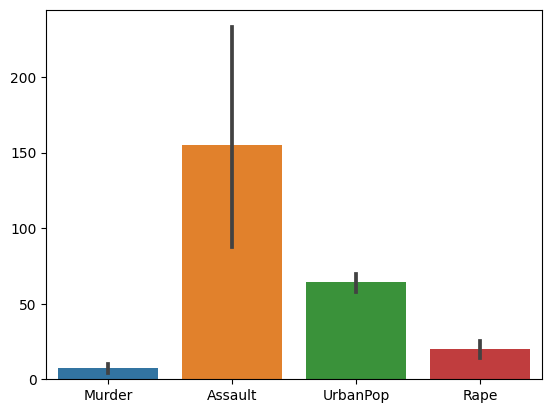

In [ ]:
sns.barplot(df.groupby('Clusters').mean())
#From the barplot, we can make an assumption that Assault, and rape are common among urban pop. Also, we can say, that the people who are getting assaulted are most likely to be murdered.
#This point can also be concluded by looking at the strong correlation between murder and assault.

<Axes: ylabel='Clusters'>

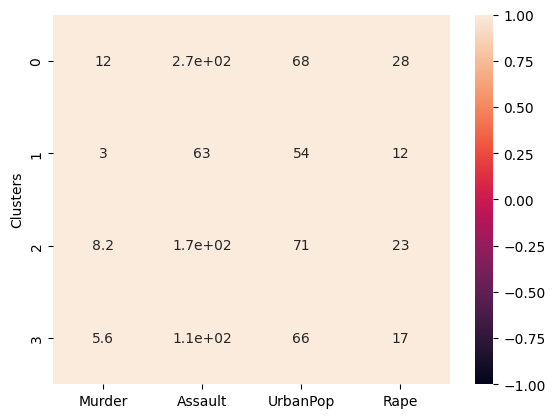

In [ ]:
sns.heatmap(df.groupby('Clusters').mean(), vmin=-1, vmax=1, annot=True)

<Axes: >

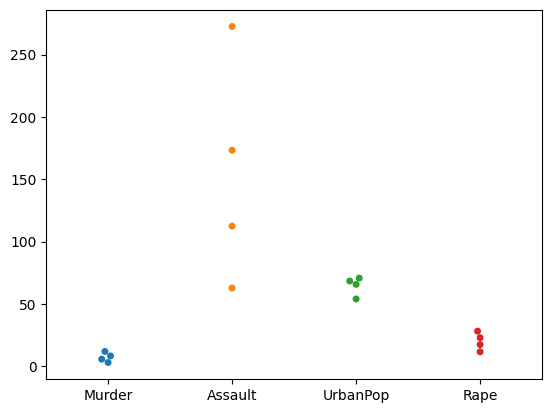

In [ ]:
sns.swarmplot(df.groupby('Clusters').mean())

In [ ]:
#Profiling with K-Means

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()

In [ ]:
uno = X.fit_transform(df)

In [ ]:
from sklearn.cluster import KMeans
K_means = KMeans(n_clusters=2)

In [ ]:
K_means.fit(uno)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
z = K_means.labels_

In [ ]:
df['Labels'] = z

In [ ]:
df.head()

,Murder,Assault,UrbanPop,Rape,Clusters,Labels
0,13.2,236,58,21.200,0,1
1,10.0,263,48,42.825,0,1
2,8.1,294,80,31.000,0,1
3,8.8,190,50,19.500,2,0
4,9.0,276,91,40.600,0,1


In [ ]:
df.groupby('Labels').mean()

,Murder,Assault,UrbanPop,Rape,Clusters
Labels,,,,,
0,4.834483,110.172414,63.344828,15.948276,2.00000
1,11.866667,254.428571,68.571429,28.297619,0.47619


In [ ]:
K_means.inertia_

133.6925429812788

In [ ]:
#We see that, with k value as 2, we don't exactly see any heterogeneity among the clusters, lets try with other values of k.
#Lets take the help of wss plot for it.

In [ ]:
wss=[]
for i in range(1,11):
  K_means = KMeans(n_clusters=i)
  K_means.fit(uno)
  wss.append(K_means.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wss

[250.00000000000006,
 133.6925429812788,
 100.13356859043162,
 79.60614706436259,
 68.5206553859833,
 58.141625273139866,
 51.92200783493686,
 47.71084704004613,
 43.38765187681645,
 38.37271618185002]

In [ ]:
k_values=range(1,11)

Text(0.5, 1.0, 'WSS Plot')

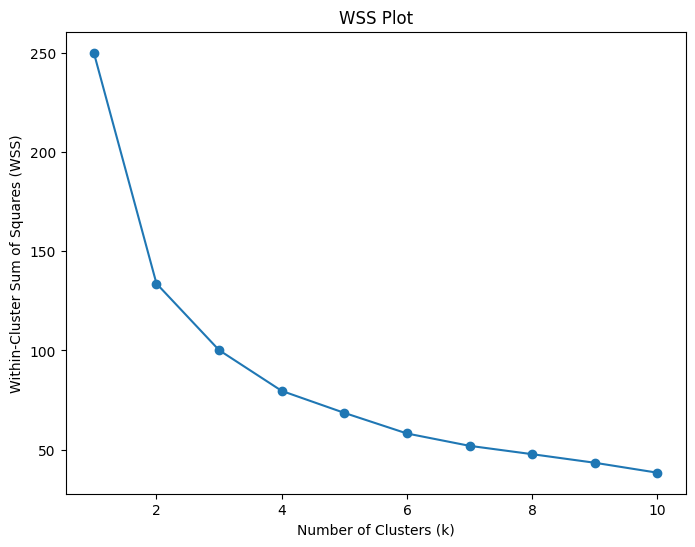

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, wss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('WSS Plot')

In [ ]:
#Looking at the wss plot, we can try to consider k value as 2.

In [ ]:
K_means = KMeans(n_clusters=3)
K_means.fit(uno)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
z = K_means.labels_

In [ ]:
df['Labels'] = z

In [ ]:
df.groupby('Labels').mean()

,Murder,Assault,UrbanPop,Rape,Clusters
Labels,,,,,
0,2.688889,64.555556,50.666667,10.544444,1.000000
1,12.010000,258.250000,68.500000,28.302500,0.400000
2,5.952381,132.952381,69.095238,18.847619,2.428571


In [ ]:
#Profilling for K-Means
#We got kvalue as 3 to be appropiate
#People not belonging to the urban population --> least likely to be assualted --> least likely to be raped --> least likely to be murdered.
#People not exactly belonging to the urban population(might have travelled from rural to urban)--> most likely to be assualted --> most likely to be raped --> most likely to be murdered.
#People belonging to urban population --> less likely to be assaulted --> less likely to be raped --> less likely to be murdered.

In [ ]:
#Let's try with DBScan now.

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN(eps = 1.5, min_samples=5)

In [ ]:
db.fit(uno) #1-4,

DBSCAN(eps=1.5)

In [ ]:
z = db.labels_

In [ ]:
df['Labels'] = z

In [ ]:
df.groupby('Labels').mean()

,Murder,Assault,UrbanPop,Rape,Clusters
Labels,,,,,
-1,7.950000,250.500000,60.000000,29.312500,0.000000
0,12.364286,275.714286,69.500000,27.894643,0.000000
1,7.120833,147.916667,68.541667,20.520833,2.416667
2,2.950000,62.700000,53.900000,11.510000,1.000000


In [ ]:
#Profiling
#People not among urbanpop --> least likely to be assaulted --> least likely to be raped --> And then least likely to get murdered.
#People not exactly belonging to the urbanpop(might be, they came from rural to urban)--> most likely to be assaulted -->most likely to be raped --> And then most likely to be  murdered.
#People belonging to urbanpop --> less likely to be assaulted --> less likely to be raped --> And then less likely to be  murdered.

#Looking at all the 3 clustering algorithms, we can interpret that:


*   The people who are assualted, raped and murdered the most, might be
those who recently came from rural to urban, and are unaware of the threats in the urban life.
*   The people who have been assualted the least do not belong to the urban pop at all, which suggests that rapes and murders are more common at urban places.


*   Lastly, people among urban pop might be very well educated about the threats in the city, so they take precautions, due to which they are less likely to be assaulted, murdered and raped.




